In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def string_to_tuple(input):
    output = input.strip('()')
    return  pd.Series(map(float, output.split(', ')))

def expand_col(df, col):
    if type(df.loc[0, col]) == str:
        col_expanded = df[col].apply(string_to_tuple)
    col_expanded.columns = [f'{col}_{i}' for i in range(len(col_expanded.columns))]
    df_new = pd.concat([df, col_expanded], axis=1)
    return df_new.drop(col, axis=1)

def index_unique_vals(df, col):
    return dict(zip(df[col].unique(), np.arange(df[col].nunique())))

In [11]:
def plot_grid(data, x, y, var_rows, var_cols, var_colors, x_scale=None):
    index_cols, index_rows = index_unique_vals(data, var_cols), index_unique_vals(data, var_rows)
    n_cols, n_rows = len(index_cols), len(index_rows)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows), sharex=True, sharey=True)
    for group_params, data_subplot in data.groupby([var_rows, var_cols]):
        row, col = index_rows[group_params[0]], index_cols[group_params[1]]
        if n_rows == 1:
            ax = axes[col]
        elif n_cols == 1:
            ax = axes[row]
        else:
            ax = axes[row, col]
        for label, data_line in data_subplot.groupby(var_colors):
            data_line.sort_values(by=x, inplace=True)
            ax.plot(data_line[x], data_line[y], label=label)
            
        if col == 0:
            ax.set_ylabel(f'{var_rows}: {group_params[0]}', size='large', fontweight='bold')
        if row == n_rows - 1:
            ax.set_xlabel(x)
            if x_scale and x_scale != 'linear':
                ax.set_xscale(x_scale)
            # ax.set_xticks(data_line[x])
            # ax.set_xticklabels(data_line[x])
        elif row == 0:
            ax.set_title(f'{var_cols}: {group_params[1]}', size='large', fontweight='bold')
        
        ax.grid()
        ax.legend()
    fig.tight_layout()
    return fig

In [38]:
dfs = pd.read_csv('gridsearch_results.csv').dropna()
df_expanded = expand_col(dfs, 'hidden_dims')
df_latent_dim = df_expanded[df_expanded['hidden_dims_0'] == 1.0]
df_first_dim = df_expanded[(df_expanded['hidden_dims_1'] == 0.1) & (df_expanded['hidden_dims_0'] != 1.0)]

In [39]:
df_avg = df_expanded.groupby(['hidden_dims_0', 'hidden_dims_1', 'dropout', 'n_layers', 'clf']).agg('mean')
df_avg.reset_index(inplace=True)
df_avg_latent_dim = df_avg[df_avg['hidden_dims_0'] == 1.0]
df_avg_first_dim = df_avg[(df_avg['hidden_dims_1'] == 0.1) & (df_avg['hidden_dims_0'] != 1.0)]

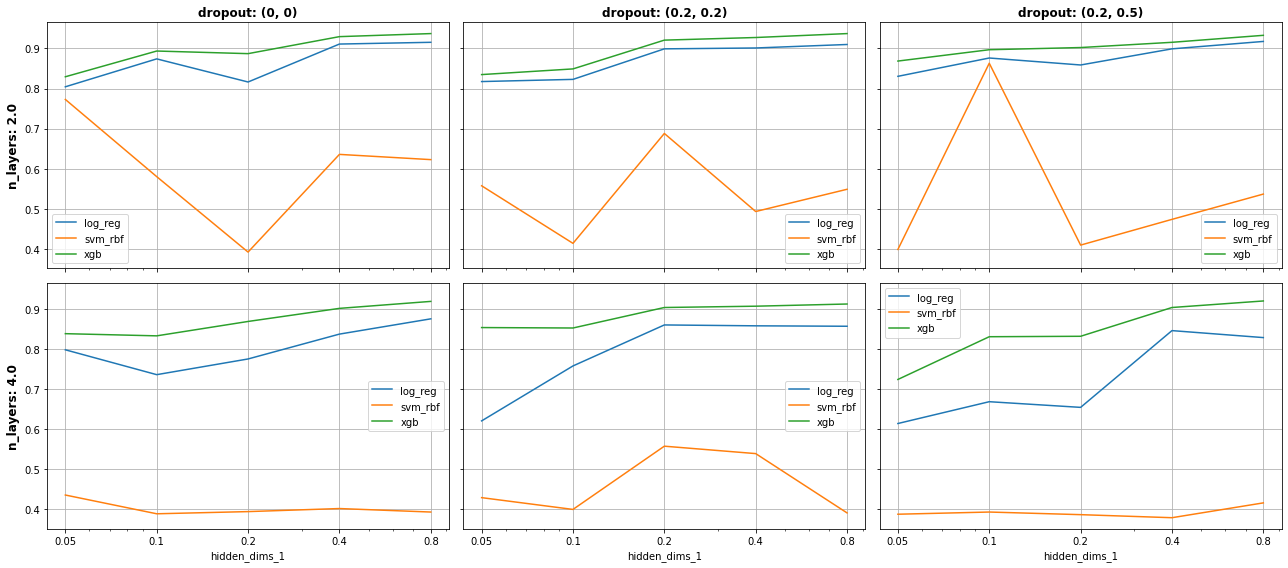

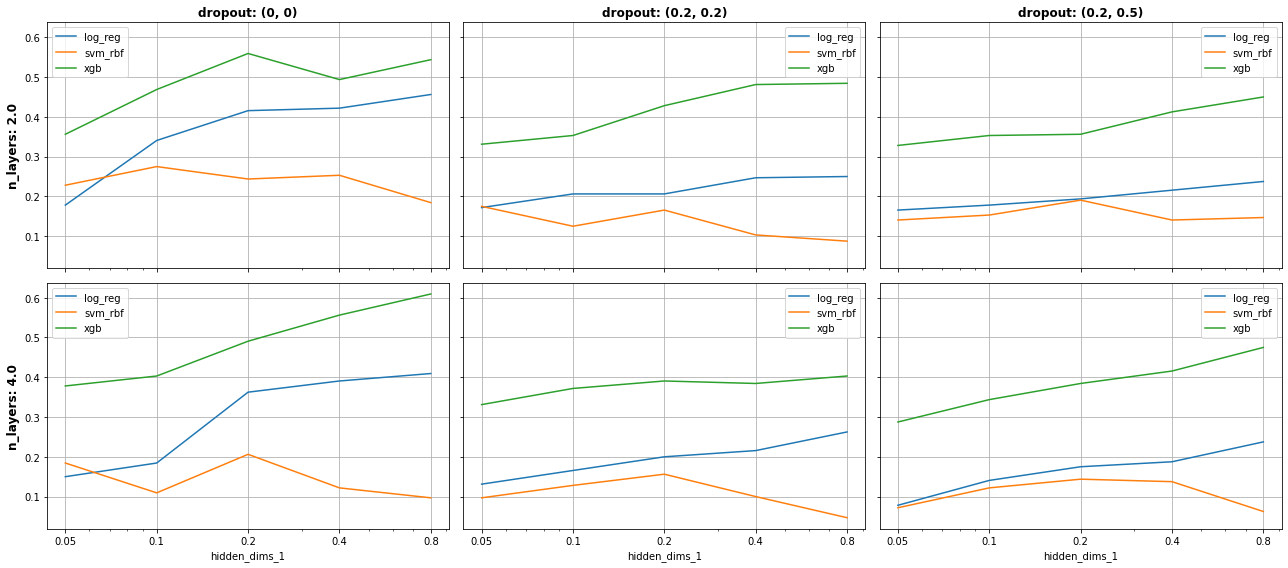

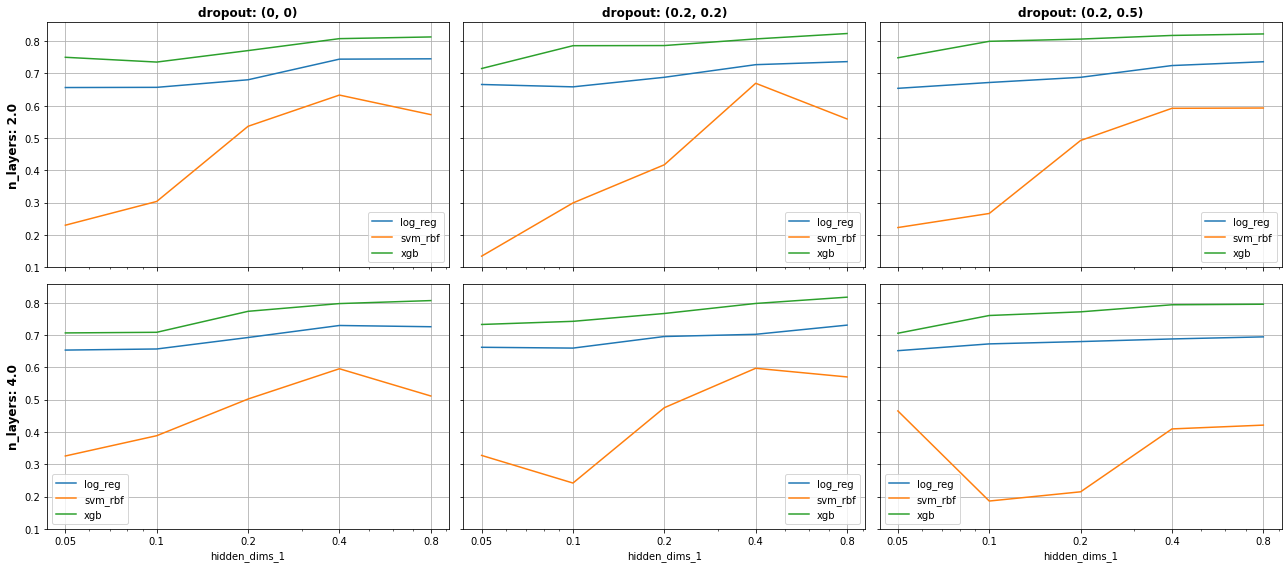

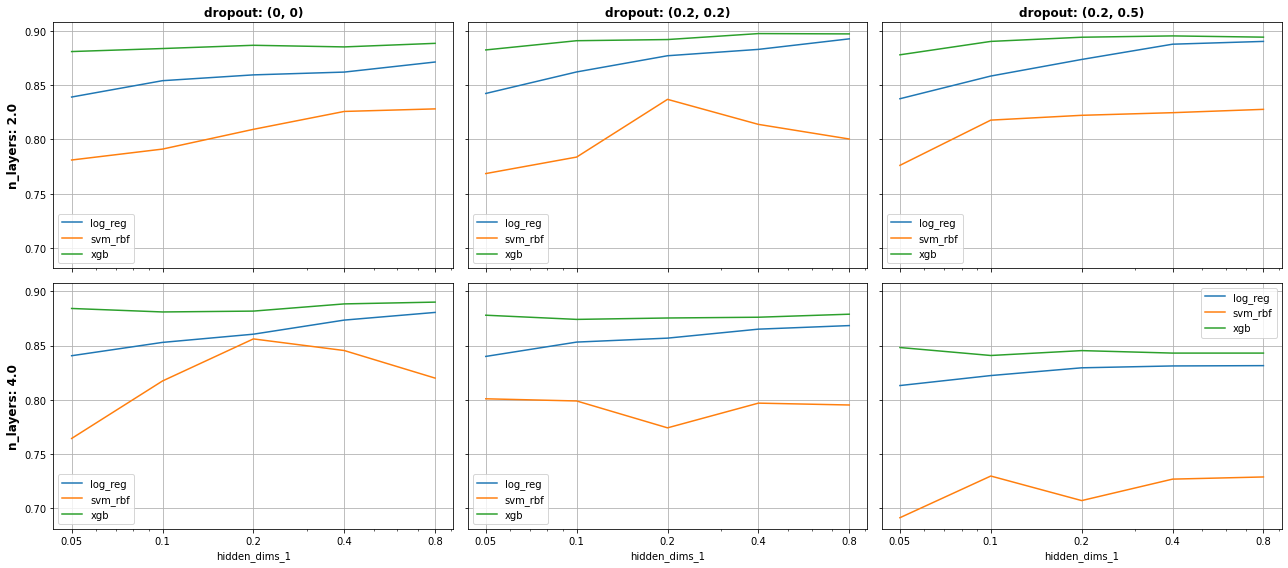

In [41]:
for dataset_id, data in df_latent_dim.groupby('dataset_id'):
    fig = plot_grid(data=data, x='hidden_dims_1', y='mean_test_score', var_rows='n_layers', var_cols='dropout', var_colors='clf', x_scale='log')
    plt.savefig(f'plots/accuracy_vs_latent_dim_{dataset_id}.png')

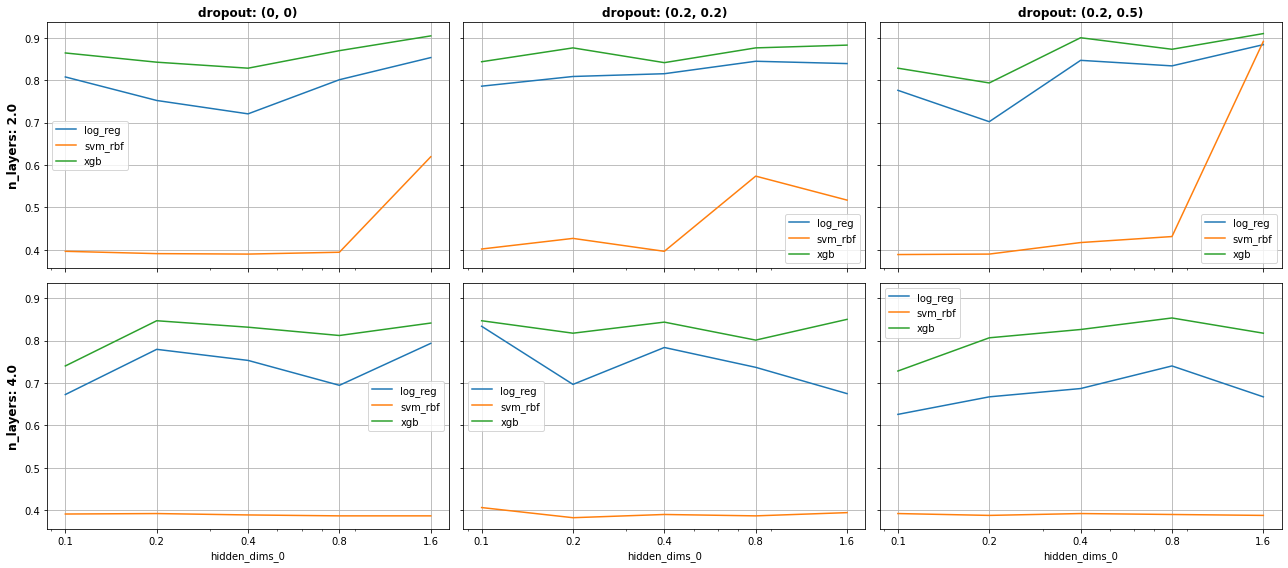

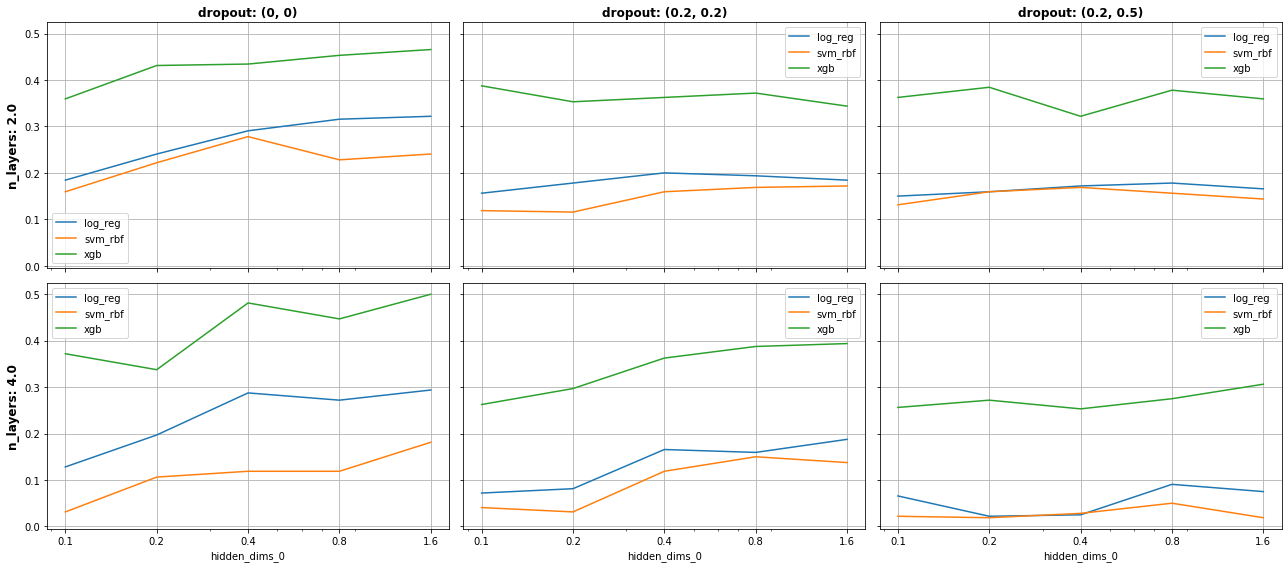

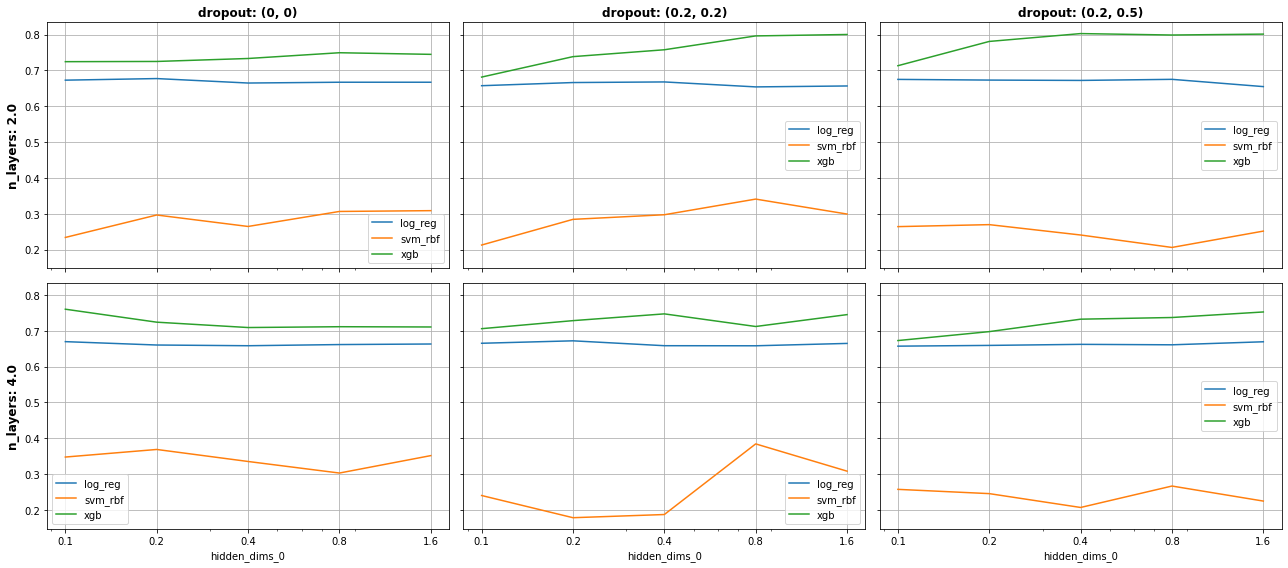

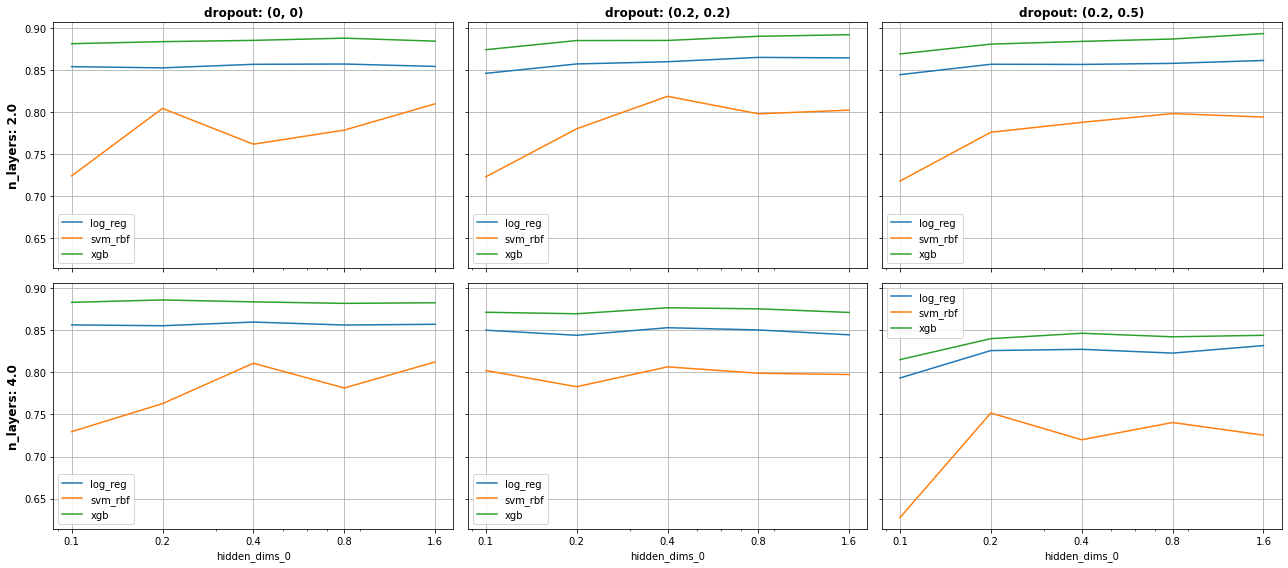

In [42]:
for dataset_id, data in df_first_dim.groupby('dataset_id'):
    fig = plot_grid(data=data, x='hidden_dims_0', y='mean_test_score', var_rows='n_layers', var_cols='dropout', var_colors='clf', x_scale='log')
    plt.savefig(f'plots/accuracy_vs_first_dim_{dataset_id}.png')

In [ ]:
fig = plot_grid(data=df_avg_latent_dim, x='hidden_dims_1', y='mean_test_score', var_rows='n_layers', var_cols='dropout', var_colors='clf', x_scale='log')
plt.savefig(f'./plots/avg_accuracy_vs_latent_dim.png')

In [ ]:
fig = plot_grid(data=df_avg_first_dim, x='hidden_dims_0', y='mean_test_score', var_rows='n_layers', var_cols='dropout', var_colors='clf', x_scale='log')
plt.savefig(f'plots/avg_accuracy_vs_first_dim.png')

In [4]:
dfs = pd.read_csv('gridsearch_results_1.csv')

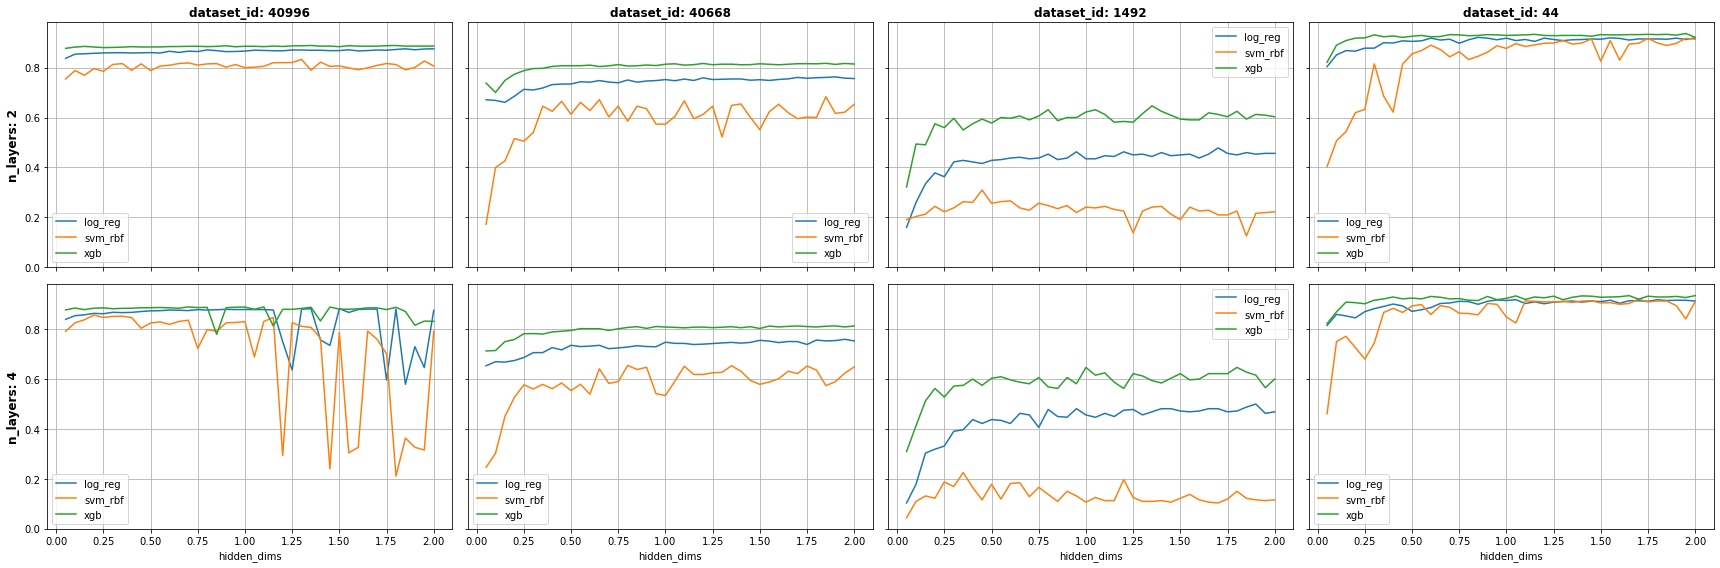

In [12]:
fig = plot_grid(data=dfs, x='hidden_dims', y='mean_test_score', var_rows='n_layers', var_cols='dataset_id', var_colors='clf')
plt.savefig(f'plots/accuracy_vs_first_dim_all_datasets.png')